# 6.3. Debugging algorithms with learning curves

## Comment
The key takeaway of this section is to learn how to create and interprete the learning curves. Notice the x-axis of the curve is the number of training samples, not epochs. In general, the x-axis is the percentage of the entire dataset expressed in the number of samples.


## Sources:
New part
* [Debugging algorithms with learning and validation curves](https://render.githubusercontent.com/view/ipynb?commit=1b01e733d15a1808ebdb0e07e46dbb9cb1634323&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f72617362742f707974686f6e2d6d616368696e652d6c6561726e696e672d626f6f6b2d326e642d65646974696f6e2f316230316537333364313561313830386562646230653037653436646262396362313633343332332f636f64652f636830362f636830362e6970796e62&nwo=rasbt%2Fpython-machine-learning-book-2nd-edition&path=code%2Fch06%2Fch06.ipynb&repository_id=81413897&repository_type=Repository#Debugging-algorithms-with-learning-and-validation-curves)

Related parts
* [Streamlining workflows with pipelines](https://render.githubusercontent.com/view/ipynb?commit=1b01e733d15a1808ebdb0e07e46dbb9cb1634323&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f72617362742f707974686f6e2d6d616368696e652d6c6561726e696e672d626f6f6b2d326e642d65646974696f6e2f316230316537333364313561313830386562646230653037653436646262396362313633343332332f636f64652f636830362f636830362e6970796e62&nwo=rasbt%2Fpython-machine-learning-book-2nd-edition&path=code%2Fch06%2Fch06.ipynb&repository_id=81413897&repository_type=Repository#Streamlining-workflows-with-pipelines)
* [Using k-fold cross-validation to assess model performance](https://render.githubusercontent.com/view/ipynb?commit=1b01e733d15a1808ebdb0e07e46dbb9cb1634323&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f72617362742f707974686f6e2d6d616368696e652d6c6561726e696e672d626f6f6b2d326e642d65646974696f6e2f316230316537333364313561313830386562646230653037653436646262396362313633343332332f636f64652f636830362f636830362e6970796e62&nwo=rasbt%2Fpython-machine-learning-book-2nd-edition&path=code%2Fch06%2Fch06.ipynb&repository_id=81413897&repository_type=Repository#Using-k-fold-cross-validation-to-assess-model-performance)

## Summary
* Learn how to plot two types of learning curves: training accuracy & validation accuracy. 
* Learn how to interpret the learning curves 
  * Smaller variance is better. Answer the following questions given two learning curves.
  * Q1: How much training samples should be used?
  * Q2: What is the appropriate hyperparameter C for the best performance?

<img src="images/6_3-diagnosing_bias_and_variance.png">

## Code
Note PCA is not used and L2 regularization is used for LogisticRegression.

### Load the Dataset

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Fetch the dataset
url2breast_cancer_wisconsin_dataset='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
url2dataset = url2breast_cancer_wisconsin_dataset
df = pd.read_csv( url2dataset, header=None)

# Get the actual data & label from the dataset
X = df.loc[:, 2:].values # actual data
y = df.loc[:, 1].values  # label

# Encode B to 0 and M to 1
le = LabelEncoder()
y = le.fit_transform(y)

# Split to train & test data
test_over_train_ratio = 0.2
random_seed = 1
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_over_train_ratio, stratify=y, random_state=random_seed )

### Prepare the Model

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline( StandardScaler(),
                         LogisticRegression( solver='liblinear', penalty='l2', random_state=1)
                       )

### Train the Model

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_accuracies, valid_accuracies = learning_curve( estimator=pipe_lr, 
                                                         X=X_train, y=y_train,
                                                         train_sizes=np.linspace(0.1,1.0,10),  # Ratio of the datasetset
                                                         cv=10,  # 10-Fold Cross-validation 
                                                         n_jobs=1
                                                       )

### Compute the Performance

In [30]:
mean_train_accuracy = np.mean( train_accuracies, axis=1 )
std_train_accuracy = np.std( train_accuracies, axis=1 )
upper_bound_train_accuracy = mean_train_accuracy+std_train_accuracy
lower_bound_train_accuracy = mean_train_accuracy-std_train_accuracy

mean_valid_accuracy = np.mean( valid_accuracies, axis=1 )
std_valid_accuracy = np.std( valid_accuracies, axis=1 )
upper_bound_valid_accuracy = mean_valid_accuracy+std_valid_accuracy
lower_bound_valid_accuracy = mean_valid_accuracy-std_valid_accuracy

### Plot the Performance

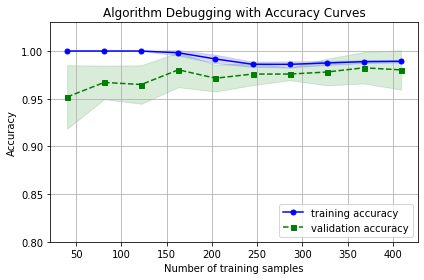

In [24]:
import matplotlib.pyplot as plt

plt.plot( train_sizes, mean_train_accuracy,
          color='blue', marker='o', markersize=5,
          label='training accuracy')
plt.fill_between( train_sizes, upper_bound_train_accuracy, lower_bound_train_accuracy,
                alpha=0.15, color='blue')
plt.plot( train_sizes, mean_valid_accuracy,
          color='green', marker='s', markersize=5, linestyle='--',
          label='validation accuracy')
plt.fill_between( train_sizes, upper_bound_valid_accuracy, lower_bound_valid_accuracy,
                alpha=0.15, color='green')
plt.grid()
plt.title('Algorithm Debugging with Accuracy Curves')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim( [0.8,1.03] )
plt.tight_layout()
plt.show()

### Interprete the Learning Curves
* Q1: How much training samples should be used?
* A1: The number of training samples should be larger than 250. (Smaller variance is better.)

### Hyperparameter Tuning: Appropriate Value for C in Logistic Regression
Plot the accuracy curves with respect to a hyperparameter C which is a regularization parameter for logistic regression.

In [26]:
from sklearn.model_selection import validation_curve

range_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_accuracies, valid_accuracies = validation_curve( estimator=pipe_lr,
                                                      X=X_train, y=y_train,
                                                      param_name='logisticregression__C',
                                                      param_range=range_C,
                                                      cv=10  # Cross-validation
                                                     )

mean_train_accuracy = np.mean( train_accuracies, axis=1 )
std_train_accuracy = np.std( train_accuracies, axis=1 )
upper_bound_train_accuracy = mean_train_accuracy+std_train_accuracy
lower_bound_train_accuracy = mean_train_accuracy-std_train_accuracy

mean_valid_accuracy = np.mean( valid_accuracies, axis=1 )
std_valid_accuracy = np.std( valid_accuracies, axis=1 )
upper_bound_valid_accuracy = mean_valid_accuracy+std_valid_accuracy
lower_bound_valid_accuracy = mean_valid_accuracy-std_valid_accuracy

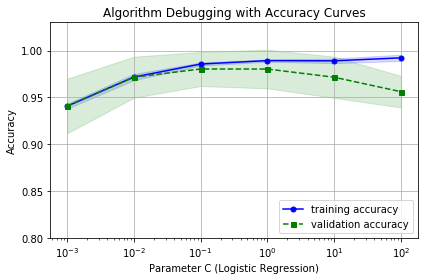

In [28]:
# This part is the same as the previous part to plot the curves
#   EXCEPT the x-axis. Previously, train_sizes in the linear scale.
#   Currently, range_C in the log scale.
plt.plot( range_C, mean_train_accuracy,
          color='blue', marker='o', markersize=5,
          label='training accuracy')
plt.fill_between( range_C, upper_bound_train_accuracy, lower_bound_train_accuracy,
                alpha=0.15, color='blue')
plt.plot( range_C, mean_valid_accuracy,
          color='green', marker='s', markersize=5, linestyle='--',
          label='validation accuracy')
plt.fill_between( range_C, upper_bound_valid_accuracy, lower_bound_valid_accuracy,
                alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.title('Algorithm Debugging with Accuracy Curves')
plt.xlabel('Parameter C (Logistic Regression)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim( [0.8,1.03] )
plt.tight_layout()
plt.show()

### Interpret the Learning Curve
* Q2: What is the appropriate hyperparameter C for the best performance?
* A2: Appropriate values for C is between 0.01 and 0.1.

(EOF)